Data Shape: (400, 4096)
Target Shape: (400,)
Hidden count: 200
Epoch 0
Epoch 1
Epoch 2
Iteration 1000


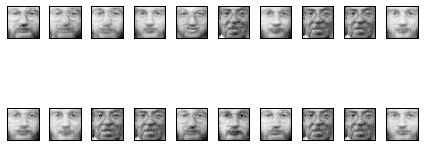

Epoch 3
Epoch 4
Iteration 2000


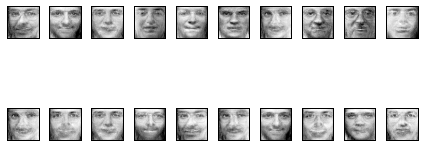

Epoch 5
Epoch 6
Epoch 7
Iteration 3000


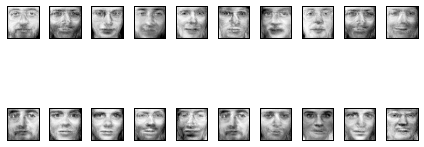

Epoch 8
Epoch 9
Iteration 4000


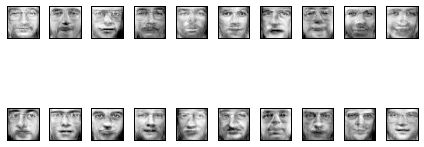

Epoch 10
Epoch 11
Epoch 12
Iteration 5000


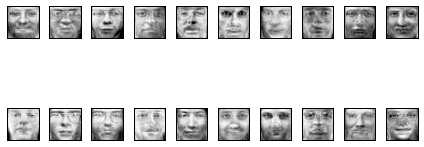

Epoch 13
Epoch 14
Iteration 6000


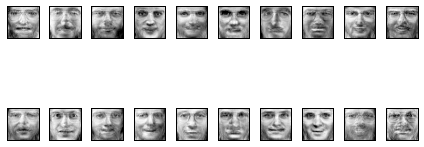

Epoch 15
Epoch 16
Epoch 17
Iteration 7000


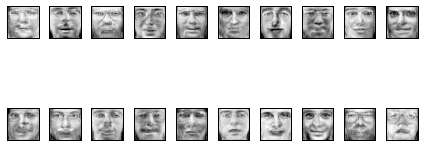

Epoch 18
Epoch 19
Iteration 8000


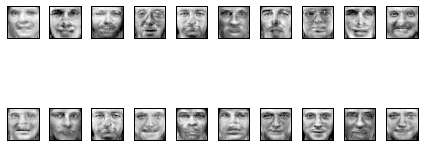

Epoch 20
Epoch 21
Epoch 22
Iteration 9000


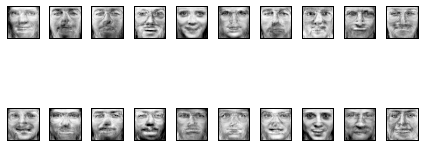

Epoch 23
Epoch 24
Iteration 10000


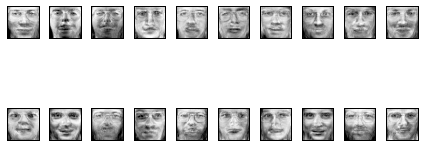

Epoch 25
Epoch 26
Epoch 27
Iteration 11000


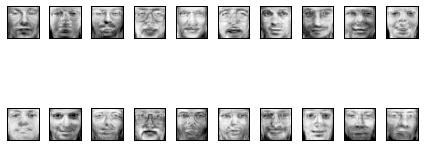

Epoch 28
Epoch 29
Iteration 12000


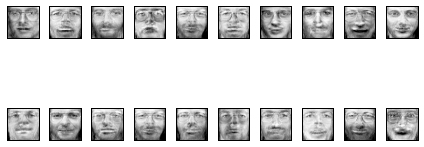

Epoch 30
Epoch 31
Epoch 32
Iteration 13000


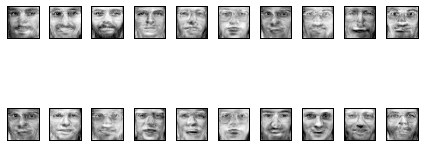

Epoch 33
Epoch 34
Iteration 14000


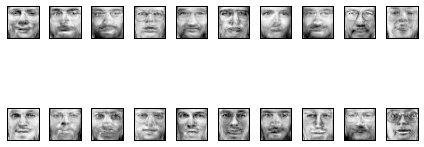

Epoch 35
Epoch 36
Epoch 37
Iteration 15000


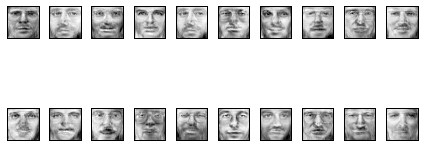

Epoch 38


KeyboardInterrupt: 

In [1]:
%matplotlib inline

# %load ../examples/facesunlabeled.py
from util import get_olivetti_faces, ImageExperiment
from gsdr import GSDRStack
import numpy as np

np.random.seed(123)

# Get the data
data, target = get_olivetti_faces()
print("Data Shape:", data.shape)
print("Target Shape:", target.shape)
input_size = (64, 64)
input_count = data.shape[1]

# Create the network
hidden_count = 200
print("Hidden count:", hidden_count)

gsdr = GSDRStack()

# No idea what the best way to stack these layers is, but let's try decreasing SDR size
# and decreasing sparsity (ie. more activated units in the SDR)
gsdr.add(input_count=input_count, hidden_count=hidden_count, sparsity=0.2)
gsdr.add(hidden_count=hidden_count, sparsity=0.15)
gsdr.add(hidden_count=hidden_count, sparsity=0.10)
gsdr.add(hidden_count=hidden_count, sparsity=0.05)
gsdr.add(hidden_count=hidden_count, sparsity=0.01)

exp = ImageExperiment(gsdr, data, input_size, epochs=100, plot_iters=1000)
exp.run()
